2022-07-05 <br/>
San Francisco Rentals <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-07-05

Basic scatter plot - Completed

Special Thanks to poncest: https://twitter.com/sponce1/status/1545174488962187264/photo/1

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default="jupyterlab"
import os

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-05/rent.csv')

In [3]:
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


In [4]:
df_cleaned = df [df.beds.notna() & df.baths.notna() & df.sqft.notna()]

In [5]:
df.shape

(200796, 17)

In [6]:
df_cleaned.shape

(14629, 17)

In [7]:
df_cleaned.beds.value_counts()

2.0    6287
3.0    3632
1.0    2668
4.0    1416
5.0     355
0.0     209
6.0      50
7.0      10
8.0       2
Name: beds, dtype: int64

In [8]:
df_cleaned.baths.value_counts()

2.0    5648
1.0    5477
2.5    1396
3.0     912
1.5     777
3.5     219
4.0     108
5.0      39
4.5      36
5.5       7
6.0       4
6.5       3
7.0       2
8.0       1
Name: baths, dtype: int64

In [9]:
# Limiting the beds and baths 
df_cleaned= df_cleaned[(df_cleaned.beds<=3) & (df_cleaned.baths<=3)]

In [10]:
df_cleaned.shape

(12708, 17)

In [11]:
df_cleaned['bed_bath'] = df_cleaned.beds.astype("str")+" Beds - "+df_cleaned.baths.astype("str")+" Baths"

In [12]:
df_cleaned.bed_bath.value_counts()

2.0 Beds - 2.0 Baths    3134
1.0 Beds - 1.0 Baths    2500
2.0 Beds - 1.0 Baths    2313
3.0 Beds - 2.0 Baths    1904
3.0 Beds - 2.5 Baths     696
2.0 Beds - 1.5 Baths     471
3.0 Beds - 1.0 Baths     419
2.0 Beds - 2.5 Baths     346
3.0 Beds - 3.0 Baths     327
3.0 Beds - 1.5 Baths     209
0.0 Beds - 1.0 Baths     166
1.0 Beds - 2.0 Baths      86
1.0 Beds - 1.5 Baths      70
0.0 Beds - 2.0 Baths      37
2.0 Beds - 3.0 Baths      16
1.0 Beds - 3.0 Baths       7
1.0 Beds - 2.5 Baths       3
0.0 Beds - 2.5 Baths       2
0.0 Beds - 3.0 Baths       1
0.0 Beds - 1.5 Baths       1
Name: bed_bath, dtype: int64

In [13]:
df_reduced =df_cleaned[df_cleaned.bed_bath.isin(["1.0 Beds - 1.0 Baths", "2.0 Beds - 1.0 Baths", 
                               "2.0 Beds - 2.0 Baths", "3.0 Beds - 2.0 Baths", 
                               "3.0 Beds - 1.0 Baths"])]

In [14]:
df_reduced.shape

(10270, 18)

In [15]:
# df_reduced= df_cleaned.groupby("bed_bath")['price'].median()

In [17]:
df_reduced_median = df_reduced.groupby(['year','county','bed_bath'])[["sqft","price"]].median().reset_index()

In [19]:
fig = px.scatter(df_reduced_median, x="sqft", y="price", color="bed_bath", symbol="bed_bath",hover_data=['bed_bath', 'sqft',"price","county"], title= "Median cost per queare feet by Room dimensions")
fig.show()

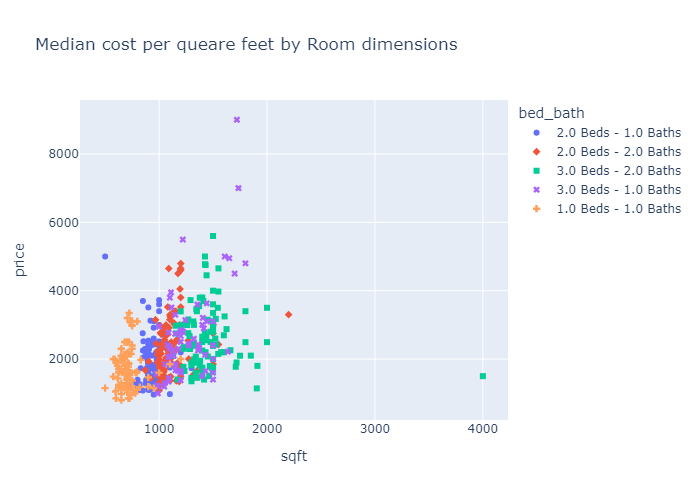

In [22]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)